In [ ]:
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install pymc3
%pip install scipy
%pip install arviz
%pip install graphviz
! export PATH=$PATH:/opt/homebrew/bin/dot

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached pymc3-3.11.6-py3-none-any.whl.metadata (15 kB)
  Using cached deprecat-2.1.3-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached fastprogress-1.0.3-py3-none-any.whl.metadata (5.6 kB)
  Using cached numpy-1.22.1.zip (11.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
ERROR: Exception:
Traceback (most recent call last):
  File "/Users/jamesphoughton/github/topic_choice/.venv/lib/python3.12/site-packages/pip/_internal/cli/base_command.py", line 106, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "/Users/jamesphoughton/github/topic_choice/.venv/lib/python3.12/site-packages/pip/_internal/cli/base_command.py", line 97, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from textwrap import wrap

WHARTON_RED = "#990000"
WHARTON_BLUE = "#011F5B"
WHARTON_GRAY = "#7F7F7F"
WHARTON_MEDIUM_BLUE = "#82AFD3"
WHARTON_LIGHT_BLUE = "#C2D8E9"
WHARTON_LIGHT_RED = "#DCB0B0"

# load data

In [ ]:

# load data
data = pd.read_csv("topic_pretest_responses.csv", header=[0])

# collapse party id into 3 categories: Republican + Lean Republican, Democrat + Lean Democrat, True Independent
def party_score(row):
    if row['Generally speaking, do you usually think of yourself as a Republican, a Democrat, an Independent, or what? - Selected Choice'] == 'Republican':
        return "Republican"
    elif row['Generally speaking, do you usually think of yourself as a Republican, a Democrat, an Independent, or what? - Selected Choice'] == 'Democrat':
        return "Democrat"
    elif row['Do you think of yourself as closer to the Republican Party or the Democratic Party?'] == "Closer to Republican Party":
        return "Republican"
    elif row['Do you think of yourself as closer to the Republican Party or the Democratic Party?'] == "Closer to Democratic Party":
        return "Democrat"
    else:
        return "Independent"

data["party"] = data.apply(party_score, axis=1)

print("pre-filtering data shape", data.shape)

# exclude those who fail attention check 1
exclude_values = ["Mostly Yes", "Slightly Yes", "Neutral", "Slightly No", "Mostly No", "Strongly No"]
data = data[~data["What is your opinion on the following topics? - Show you are paying attention by selecting strongly yes."].isin(exclude_values)]

# exclude those who fail attention check 2
exclude_values = ["Strongly Yes", "Mostly Yes", "Slightly Yes", "Neutral", "Slightly No", "Strongly No"]
data = data[~data["What is your opinion on the following topics? - Show you are paying attention by selecting mostly no."].isin(exclude_values)]

# exclude those who told us they did not pay attention
data = data[data["In your honest opinion, should we use your survey responses in our analysis?\n(This will not affect your payment)"] != "No, I didn't pay attention"] 
data = data[data["party"] != "Independent"] # exclude those who are not Republican or Democrat

# drop attention check columns
data = data.drop([
    "What is your opinion on the following topics? - Show you are paying attention by selecting strongly yes.", 
    "What is your opinion on the following topics? - Show you are paying attention by selecting mostly no.",
    "In your honest opinion, should we use your survey responses in our analysis?\n(This will not affect your payment)"
    ], axis=1)


# filter out columns that contain the attitude attributes
cols = [col for col in data.columns if (not col.startswith("Should"))]
data = data[cols]

# reset index
data.reset_index(drop=True, inplace=True)
data.set_index("party", inplace=True)

# only keep the topic questions
topic_questions = [col for col in data.columns if "What is your opinion on the following topics?" in col]
data = data[topic_questions]
data.columns = [col.split(" - ")[1] for col in data.columns]

# drop columns for which we have no data
data = data.dropna(axis=1, how='all')

print("post-filtering data shape", data.shape)
print("total number of responses", data.notna().sum().sum())
data


pre-filtering data shape (735, 1006)
post-filtering data shape (713, 174)
total number of responses 25465


,Should abortion be legal?,Should animals be used for scientific or commercial testing?,Should K-12 students dissect animals in science classrooms?,Should parents or other adults be able to ban books from schools and libraries?,Should birth control pills be available over-the-counter (OTC)?,Should bottled water be banned?,"Should churches (including mosques, synagogues, etc.) remain tax-exempt?",Should adults have the right to carry a concealed handgun?,Should corporal punishment be used in K-12 schools?,Should the federal corporate income tax rate be raised?,...,Should the US ban hydraulic fracturing (fracking)?,Should the government provide more funding for public housing?,Should the United States implement a universal preschool program?,Should there be a ban on genetic modification of crops?,Should the US government fund needle exchange programs?,Should the United States ban the export of military-grade weapons?,Should the government impose stricter regulations on mining practices?,Should the US adopt a single-payer health care system?,Should the US government pass a bill to protect access to contraception?,Should museums be required to return artifacts taken from other countries without permission?
party,,,,,,,,,,,,,,,,,,,,,
Democrat,NaN,NaN,NaN,Strongly No,NaN,NaN,NaN,NaN,Strongly No,NaN,...,NaN,NaN,NaN,Mostly Yes,NaN,NaN,NaN,NaN,NaN,NaN
Democrat,NaN,NaN,NaN,NaN,NaN,Mostly No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Republican,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Slightly Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Democrat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Neutral,NaN,Slightly Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Democrat,NaN,NaN,NaN,NaN,NaN,Strongly Yes,NaN,NaN,NaN,NaN,...,NaN,Strongly Yes,Strongly Yes,NaN,NaN,Strongly No,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Republican,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Slightly Yes,NaN,NaN,...,Slightly Yes,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,Neutral,Slightly Yes
Republican,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Neutral,NaN,NaN,...,Neutral,NaN,NaN,NaN,NaN,NaN,NaN,Slightly Yes,Slightly Yes,Neutral
Republican,Slightly Yes,NaN,NaN,NaN,NaN,NaN,NaN,Strongly Yes,NaN,NaN,...,Slightly Yes,NaN,NaN,NaN,NaN,NaN,NaN,Slightly Yes,Mostly Yes,Neutral


In [5]:
study_topic_responses = pd.read_csv("topic_study_responses.csv", index_col=0)
study_topic_responses


,Should the US government fund needle exchange programs?,Should the US continue providing military aid to Israel?,Should the federal government pay reparations to the descendants of slaves?,Should the United States implement a universal basic income?,Should school dress codes be implemented and enforced?,Should the government provide free internet access to all citizens?,Should more gun control laws be enacted?,Should abortion be legal?,Should teachers get tenure?,Should the US military budget be reduced?,Should the drinking age be lowered from 21 to a younger age?,Should performance-enhancing drugs be accepted in sports?,Should the US implement a cap-and-trade system for carbon emissions?,Should cities defund the police to combat systemic discrimination?,Should the United States maintain its embargo against Cuba?,Should the United States ban the sale of sugary drinks in schools?,Should the government use controlled burns to control wildfires?,Should the government provide grants for minority-owned businesses?,"Should colleges use affirmative action policies, such as considering an applicant’s ethnicity, income level, etc.?",Should the US provide reparations for Native American tribes?
party,,,,,,,,,,,,,,,,,,,,
Democrat,Strongly No,Slightly Yes,Mostly No,Slightly Yes,Mostly Yes,Mostly Yes,Strongly Yes,Mostly No,Mostly No,Neutral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Republican,Strongly No,Strongly No,Strongly No,Strongly No,Mostly Yes,Strongly Yes,Strongly No,Mostly No,Strongly No,Strongly Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Democrat,Strongly No,Strongly No,Strongly Yes,Strongly Yes,Slightly Yes,Strongly Yes,Strongly Yes,Strongly Yes,Strongly Yes,Strongly No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Republican,Mostly Yes,Mostly Yes,Slightly No,Strongly No,Neutral,Neutral,Mostly Yes,Strongly Yes,Neutral,Mostly No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Democrat,Strongly No,Mostly Yes,Strongly Yes,Strongly Yes,Slightly No,Strongly Yes,Mostly Yes,Mostly Yes,Strongly Yes,Slightly Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Republican,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly No,Strongly No,Strongly No,Strongly No,Slightly No,Strongly No,Mostly Yes,Neutral,Strongly No,Strongly No
Democrat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Slightly Yes,Mostly Yes,Mostly Yes,Mostly No,Neutral,Strongly Yes,Strongly Yes,Strongly No,Neutral,Neutral
Republican,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Slightly No,Mostly No,Strongly No,Strongly No,Mostly Yes,Neutral,Mostly Yes,Strongly No,Strongly No,Strongly No


In [7]:
data = pd.concat([study_topic_responses, data])
data.shape

(1744, 174)

In [8]:
binarized_data = data.map(lambda x: "yes" if "yes" in str(x).lower() else "no" if "no" in str(x).lower() else pd.NA)
print(binarized_data.shape)
binarized_data.head()

(1744, 174)


,Should the US government fund needle exchange programs?,Should the US continue providing military aid to Israel?,Should the federal government pay reparations to the descendants of slaves?,Should the United States implement a universal basic income?,Should school dress codes be implemented and enforced?,Should the government provide free internet access to all citizens?,Should more gun control laws be enacted?,Should abortion be legal?,Should teachers get tenure?,Should the US military budget be reduced?,...,Should the government impose stricter regulations on payday lenders?,Should the US ban hydraulic fracturing (fracking)?,Should the government provide more funding for public housing?,Should the United States implement a universal preschool program?,Should there be a ban on genetic modification of crops?,Should the United States ban the export of military-grade weapons?,Should the government impose stricter regulations on mining practices?,Should the US adopt a single-payer health care system?,Should the US government pass a bill to protect access to contraception?,Should museums be required to return artifacts taken from other countries without permission?
party,,,,,,,,,,,,,,,,,,,,,
Democrat,no,yes,no,yes,yes,yes,yes,no,no,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Republican,no,no,no,no,yes,yes,no,no,no,yes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Democrat,no,no,yes,yes,yes,yes,yes,yes,yes,no,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Republican,yes,yes,no,no,<NA>,<NA>,yes,yes,<NA>,no,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Democrat,no,yes,yes,yes,no,yes,yes,yes,yes,yes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [9]:
def to_numeric(answer):
    translation = {
        "Strongly No": -3,
        "Mostly No": -2,
        "Slightly No": -1,
        "Neutral": 0,
        "Slightly Yes": 1,
        "Mostly Yes": 2,
        "Strongly Yes": 3,
    }
    if answer in translation:
        return translation[answer]
    
    return np.nan

numeric_data = data.map(to_numeric)
print(numeric_data.shape)
numeric_data.head()

(1744, 174)


,Should the US government fund needle exchange programs?,Should the US continue providing military aid to Israel?,Should the federal government pay reparations to the descendants of slaves?,Should the United States implement a universal basic income?,Should school dress codes be implemented and enforced?,Should the government provide free internet access to all citizens?,Should more gun control laws be enacted?,Should abortion be legal?,Should teachers get tenure?,Should the US military budget be reduced?,...,Should the government impose stricter regulations on payday lenders?,Should the US ban hydraulic fracturing (fracking)?,Should the government provide more funding for public housing?,Should the United States implement a universal preschool program?,Should there be a ban on genetic modification of crops?,Should the United States ban the export of military-grade weapons?,Should the government impose stricter regulations on mining practices?,Should the US adopt a single-payer health care system?,Should the US government pass a bill to protect access to contraception?,Should museums be required to return artifacts taken from other countries without permission?
party,,,,,,,,,,,,,,,,,,,,,
Democrat,-3.0,1.0,-2.0,1.0,2.0,2.0,3.0,-2.0,-2.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Republican,-3.0,-3.0,-3.0,-3.0,2.0,3.0,-3.0,-2.0,-3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Democrat,-3.0,-3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,-3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Republican,2.0,2.0,-1.0,-3.0,0.0,0.0,2.0,3.0,0.0,-2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Democrat,-3.0,2.0,3.0,3.0,-1.0,3.0,2.0,2.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Mild Acquiescence Bias')

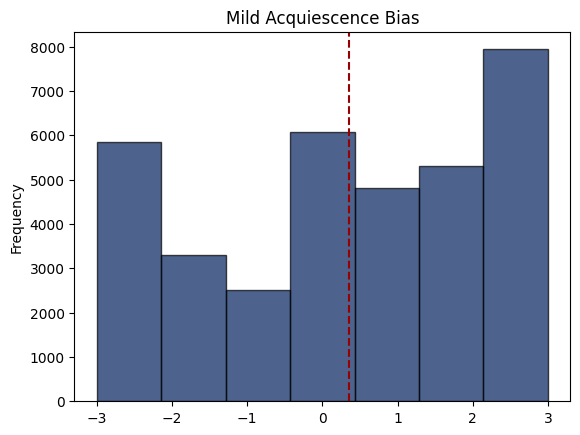

In [10]:
numeric_data.stack().plot(kind='hist', bins=7, color=WHARTON_BLUE, edgecolor='black', alpha=0.7)
ylim = plt.ylim()
plt.vlines(x=numeric_data.stack().mean(), ymin=0, ymax=(ylim[1]), color=WHARTON_RED, linestyle='--', label="Mean")
plt.ylim(ylim)
plt.title("Mild Acquiescence Bias")

# Compute matthews coefficient
This is computed on binarized data, so we do it separately from the contentiousness, which is on numeric data

In [11]:
import pandas as pd
import numpy as np

# Function to compute the absolute Matthews correlation coefficient
def abs_matthews_coeff(row):
    a = row.get(("Democrat", "yes"), 0)
    b = row.get(("Democrat", "no"), 0)
    c = row.get(("Republican", "yes"), 0)
    d = row.get(("Republican", "no"), 0)
    return abs((a * d - b * c) / ((a + b) * (a + c) * (b + d) * (c + d)) ** 0.5) if (a + b) * (a + c) * (b + d) * (c + d) != 0 else 0



# Function to perform bootstrap resampling and compute confidence intervals

n_bootstrap=1000
ci=95

long_format = binarized_data.reset_index().melt(id_vars='party', var_name='question', value_name='response').dropna(subset=['response'])
topic_features = long_format.groupby(['party', 'response', 'question']).size().unstack().fillna(0).T

# Compute the simple Matthews coefficient
topic_features['topic_polarization'] = topic_features.apply(abs_matthews_coeff, axis=1)

# Initialize lists to store bootstrap estimates
bootstrap_estimates = {question: [] for question in topic_features.index}

# Perform bootstrap resampling for each question separately
for question in topic_features.index:
    question_data = binarized_data.reset_index()[['party', question]].dropna(subset=[question])
    for _ in range(n_bootstrap):
        resampled_data = question_data.sample(frac=1, replace=True)
        long_format_resampled = resampled_data.reset_index().melt(id_vars='party', var_name='question', value_name='response').dropna(subset=['response'])
        topic_features_resampled = long_format_resampled.groupby(['party', 'response', 'question']).size().unstack().fillna(0).T
        topic_features_resampled['topic_polarization'] = topic_features_resampled.apply(abs_matthews_coeff, axis=1)
        
        if question in topic_features_resampled.index:
            bootstrap_estimates[question].append(topic_features_resampled.loc[question]['topic_polarization'])

# Compute confidence intervals
lower_ci = {}
upper_ci = {}
for question, estimates in bootstrap_estimates.items():
    lower_ci[question] = np.percentile(estimates, (100 - ci) / 2)
    upper_ci[question] = np.percentile(estimates, 100 - (100 - ci) / 2)

# Add confidence intervals to the topic_features dataframe
topic_features['topic_polarization_lower_ci'] = topic_features.index.map(lower_ci)
topic_features['topic_polarization_upper_ci'] = topic_features.index.map(upper_ci)

topic_features['polarization_contentiousness_count'] = topic_features[["Democrat", "Republican"]].sum(axis=1)

topic_features.drop(["Democrat", "Republican"], axis=1, level=0)
topic_features.columns = topic_features.columns.droplevel(1)


topic_features.head()

party,Democrat,Democrat,Independent,Independent,Republican,Republican,topic_polarization,topic_polarization_lower_ci,topic_polarization_upper_ci,polarization_contentiousness_count
question,,,,,,,,,,
Should Halloween be moved permanently to Saturday?,20.0,23.0,0.0,0.0,18.0,15.0,0.079640,0.002835,0.307457,76.0
Should K-12 students dissect animals in science classrooms?,20.0,17.0,0.0,0.0,22.0,23.0,0.051421,0.003028,0.259084,82.0
Should Puerto Rico be granted US statehood?,8.0,56.0,0.0,0.0,30.0,20.0,0.500000,0.330686,0.649043,114.0
Should Term Limits Be Imposed on U.S. Senators and Representatives?,4.0,90.0,0.0,0.0,6.0,86.0,0.050239,0.002554,0.193485,186.0
Should TikTok be banned?,49.0,15.0,0.0,0.0,42.0,31.0,0.201025,0.039279,0.358407,137.0


In [12]:
out_of_ci = topic_features[(topic_features['topic_polarization_lower_ci'] >= topic_features['topic_polarization'])].index
topic_features.loc[out_of_ci, 'topic_polarization_lower_ci'] = 0
topic_features.loc[out_of_ci]

party,Democrat,Democrat,Independent,Independent,Republican,Republican,topic_polarization,topic_polarization_lower_ci,topic_polarization_upper_ci,polarization_contentiousness_count
question,,,,,,,,,,
Should animals be used for scientific or commercial testing?,34.0,12.0,0.0,0.0,28.0,10.0,0.002590,0.0,0.256771,84.0
Should taxpayer money be used to build sporting stadiums?,37.0,7.0,0.0,0.0,43.0,8.0,0.003047,0.0,0.229493,95.0
Should the US continue its space exploration programs?,5.0,75.0,0.0,0.0,4.0,60.0,0.000000,0.0,0.183344,144.0


# Contentiousness

In [13]:
# add the contentiousness feature
topic_features['topic_contentiousness'] = numeric_data.std(axis=0)

# bootstrap the contentiousness feature
contentiousness_bootstraps = []
for _ in range(1000):
    contentiousness_bootstraps.append(numeric_data.sample(frac=1, replace=True).std(axis=0))

topic_features[["topic_contentiousness_lower_ci", "topic_contentiousness_upper_ci"]] = pd.DataFrame(contentiousness_bootstraps).quantile([0.025, 0.975], axis=0).T
topic_features.head()

party,Democrat,Democrat,Independent,Independent,Republican,Republican,topic_polarization,topic_polarization_lower_ci,topic_polarization_upper_ci,polarization_contentiousness_count,topic_contentiousness,topic_contentiousness_lower_ci,topic_contentiousness_upper_ci
question,,,,,,,,,,,,,
Should Halloween be moved permanently to Saturday?,20.0,23.0,0.0,0.0,18.0,15.0,0.079640,0.002835,0.307457,76.0,1.866029,1.657609,2.015734
Should K-12 students dissect animals in science classrooms?,20.0,17.0,0.0,0.0,22.0,23.0,0.051421,0.003028,0.259084,82.0,1.857040,1.668982,2.011503
Should Puerto Rico be granted US statehood?,8.0,56.0,0.0,0.0,30.0,20.0,0.500000,0.330686,0.649043,114.0,1.981605,1.813972,2.113073
Should Term Limits Be Imposed on U.S. Senators and Representatives?,4.0,90.0,0.0,0.0,6.0,86.0,0.050239,0.002554,0.193485,186.0,1.359520,1.175652,1.522932
Should TikTok be banned?,49.0,15.0,0.0,0.0,42.0,31.0,0.201025,0.039279,0.358407,137.0,1.915515,1.757206,2.058175


# Identity threat

In [14]:
IT_data = pd.read_csv("topic_pretest_identity_threat_responses.csv", header=[1])

print("Number of raw responses:", len(IT_data))

IT_data["party_score"] = IT_data.apply(party_score, axis=1)

# drop those who are not democrat or republican
IT_data = IT_data[IT_data["party_score"] != "Independent"]

# assume most people passed the attention check. Exclude those who didn't
attention_check_cols = [col for col in IT_data.columns if "paying attention" in col]
attention_check_vals = [IT_data[col].mode().values[0] for col in attention_check_cols]
IT_data = IT_data[IT_data[attention_check_cols[0]] == attention_check_vals[0]]
IT_data = IT_data[IT_data[attention_check_cols[1]] == attention_check_vals[1]]

# drop columns that are not topic questions
topic_questions = [col for col in IT_data.columns if "Imagine discussing each of the following topics with a stranger from the other political party." in col and "Show you are paying attention" not in col]

IT_data = IT_data[topic_questions + ["party_score"]]
IT_data.set_index("party_score", inplace=True, drop=True)

# drop columns with no data
IT_data = IT_data.dropna(axis=1, how='all')
print("Number of responses after dropping empty columns:", len(IT_data))

# shorten column names
IT_data.columns = [col.split(" - ")[1] for col in IT_data.columns]

# translate to numeric
IT_data = IT_data.replace({
    "Not at all worried about being judged": 0, 
    "Slightly worried about being judged": .25, 
    "Moderately worried about being judged": .5, 
    "Very worried about being judged": .75, 
    "Extremely worried about being judged": 1
    })

# print how many democrat responses and republican responses we have
print("Number of responses:")
print(IT_data.index.value_counts())
print("")

# print the average value of all democrats and all republicans
print("Average values:")
print(IT_data.groupby("party_score").mean().T.mean())
print("")


IT_data.head()

Number of raw responses: 152
Number of responses after dropping empty columns: 146
Number of responses:
party_score
Democrat      73
Republican    73
Name: count, dtype: int64

Average values:
party_score
Democrat      0.235100
Republican    0.242882
dtype: float64



/var/folders/2l/3kmvzs0s1sggnw_9sl0ls8080000gn/T/ipykernel_37339/3198407644.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  IT_data = IT_data.replace({


,Should abortion be legal?,Should animals be used for scientific or commercial testing?,Should parents or other adults be able to ban books from schools and libraries?,"Should churches (including mosques, synagogues, etc.) remain tax-exempt?",Should the United States maintain its embargo against Cuba?,Should the United States keep daylight saving time?,Should the death penalty be legal?,"Should police departments be defunded, if not abolished?",Should school dress codes be implemented and enforced?,Should the drinking age be lowered from 21 to a younger age?,...,Should assisted suicide be legalized nationwide?,Should public schools be required to teach financial literacy?,Should the United States forgive all student loan debt?,Should the US implement a cap-and-trade system for carbon emissions?,Should the US government fund needle exchange programs?,Should the United States ban the export of military-grade weapons?,What do you dislike about the other political party?,What do you like about your political party?,What is wrong with your political party?,What does the ‘perfect day’ look like to you?
party_score,,,,,,,,,,,,,,,,,,,,,
Democrat,NaN,NaN,0.75,0.25,0.25,0.0,0.25,NaN,0.00,0.00,...,0.50,NaN,0.25,0.25,0.50,0.25,NaN,NaN,NaN,NaN
Democrat,1.0,NaN,0.00,NaN,0.25,NaN,NaN,1.0,0.25,0.50,...,NaN,0.0,NaN,NaN,0.25,NaN,NaN,NaN,NaN,NaN
Democrat,NaN,0.25,0.50,NaN,0.00,NaN,0.25,NaN,0.00,0.00,...,NaN,0.0,NaN,0.75,0.25,0.25,NaN,NaN,NaN,NaN
Republican,NaN,NaN,0.25,NaN,0.00,NaN,NaN,0.0,0.00,0.75,...,NaN,NaN,0.00,NaN,0.00,NaN,NaN,NaN,NaN,NaN
Democrat,0.5,0.00,0.00,NaN,0.50,NaN,NaN,NaN,0.00,0.75,...,0.25,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN


In [15]:
IT_data_summary = pd.DataFrame(index=IT_data.columns)
IT_data_summary["topic_mean_identity_threat"] = IT_data.mean()
IT_data_summary["topic_std_identity_threat"] = IT_data.std()
IT_data_summary["identity_threat_count"] = IT_data.count()
IT_data_summary.sort_values("topic_mean_identity_threat", inplace=True)

# bootstrap the mean and compute confidence intervals
for col in IT_data:
    question_data = IT_data[col].dropna()
    bootstrap_means = []
    for _ in range(1000):
        bootstrap_sample = question_data.sample(frac=1, replace=True)
        bootstrap_means.append(bootstrap_sample.mean())
    lower, upper = np.percentile(bootstrap_means, [2.5, 97.5])
    IT_data_summary.loc[col, "topic_mean_identity_threat_lower_ci"] = lower
    IT_data_summary.loc[col, "topic_mean_identity_threat_upper_ci"] = upper



# Compute party-specific means and confidence intervals
IT_data_summary["Democrat_topic_mean_identity_threat"] = IT_data[IT_data.index == "Democrat"].mean()
IT_data_summary["Republican_topic_mean_identity_threat"] = IT_data[IT_data.index == "Republican"].mean()

for party in IT_data.index.unique():
    for col in IT_data:
        question_data = IT_data.loc[party][col].dropna()
        bootstrap_means = []
        for _ in range(1000):
            bootstrap_sample = question_data.sample(frac=1, replace=True)
            bootstrap_means.append(bootstrap_sample.mean())
        lower, upper = np.percentile(bootstrap_means, [2.5, 97.5])
        IT_data_summary.loc[col, f"{party}_topic_mean_identity_threat_lower_ci"] = lower
        IT_data_summary.loc[col, f"{party}_topic_mean_identity_threat_upper_ci"] = upper


for col in IT_data_summary.columns:
    topic_features[col] = IT_data_summary[col]
topic_features.head()

party,Democrat,Democrat,Independent,Independent,Republican,Republican,topic_polarization,topic_polarization_lower_ci,topic_polarization_upper_ci,polarization_contentiousness_count,...,topic_std_identity_threat,identity_threat_count,topic_mean_identity_threat_lower_ci,topic_mean_identity_threat_upper_ci,Democrat_topic_mean_identity_threat,Republican_topic_mean_identity_threat,Democrat_topic_mean_identity_threat_lower_ci,Democrat_topic_mean_identity_threat_upper_ci,Republican_topic_mean_identity_threat_lower_ci,Republican_topic_mean_identity_threat_upper_ci
question,,,,,,,,,,,,,,,,,,,,,
Should Halloween be moved permanently to Saturday?,20.0,23.0,0.0,0.0,18.0,15.0,0.079640,0.002835,0.307457,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Should K-12 students dissect animals in science classrooms?,20.0,17.0,0.0,0.0,22.0,23.0,0.051421,0.003028,0.259084,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Should Puerto Rico be granted US statehood?,8.0,56.0,0.0,0.0,30.0,20.0,0.500000,0.330686,0.649043,114.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Should Term Limits Be Imposed on U.S. Senators and Representatives?,4.0,90.0,0.0,0.0,6.0,86.0,0.050239,0.002554,0.193485,186.0,...,0.260019,54.0,0.12963,0.268519,0.234375,0.136364,0.132812,0.335938,0.068182,0.215909
Should TikTok be banned?,49.0,15.0,0.0,0.0,42.0,31.0,0.201025,0.039279,0.358407,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Topic Short Names

In [45]:
names = pd.read_csv("topic_list.csv", index_col=0)
names.columns = ["discussionTopic"]
topic_features["discussionTopic"] = [names.loc[question]["discussionTopic"] for question in topic_features.index]

topic_features.head().T


question,Should Halloween be moved permanently to Saturday?,Should K-12 students dissect animals in science classrooms?,Should Puerto Rico be granted US statehood?,Should Term Limits Be Imposed on U.S. Senators and Representatives?,Should TikTok be banned?
party,,,,,
Democrat,20.0,20.0,8.0,4.0,49.0
Democrat,23.0,17.0,56.0,90.0,15.0
Independent,0.0,0.0,0.0,0.0,0.0
Independent,0.0,0.0,0.0,0.0,0.0
Republican,18.0,22.0,30.0,6.0,42.0
Republican,15.0,23.0,20.0,86.0,31.0
topic_polarization,0.07964,0.051421,0.5,0.050239,0.201025
topic_polarization_lower_ci,0.002835,0.003028,0.330686,0.002554,0.039279
topic_polarization_upper_ci,0.307457,0.259084,0.649043,0.193485,0.358407


# Identify the points "on" the boundary


This method involves evaluating each point in a space by imagining an individual standing at that point with a 120-degree field of view. The individual rotates in a full circle, and if, at any angle, no other points are visible within their field of view, that point is considered an exterior point. This approach captures not only points that strictly lie on the geometric envelope but also those that appear near the edge when tracing the boundary. The goal is not to determine a precise mathematical boundary but to label points that visually or intuitively seem to occupy the extremities. This provides a practical way of identifying points that define the outer regions of a set, based on their relative positions.

In [ ]:
# compute if points are exterior points

def zscore(series):
    return (series - series.mean()) / series.std()

# Function to determine if a point is an interior or exterior point
def is_exterior_point(point, points, fov=120):
    angles = np.linspace(0, 360, 360)
    for angle in angles:
        rad = np.deg2rad(angle)
        direction = np.array([np.cos(rad), np.sin(rad)])
        in_view = False
        for other_point in points:
            if np.array_equal(point, other_point):
                continue
            vector = other_point - point
            angle_between = np.rad2deg(np.arccos(np.dot(direction, vector) / (np.linalg.norm(direction) * np.linalg.norm(vector))))
            if angle_between <= fov / 2:
                in_view = True
                break
        if not in_view:
            return True
    return False


# Convert the x and y points to z-scores
temp = pd.DataFrame(index=topic_features.index)
temp['matthews_z'] = zscore(topic_features['topic_polarization'])
temp['contentiousness_z'] = zscore(topic_features['topic_contentiousness'])

# Determine if each point is an interior or exterior point
points = temp[['matthews_z', 'contentiousness_z']].values
exterior_points = [i for i, point in enumerate(points) if is_exterior_point(point, points)]
topic_features['polarization_contentiousness_exterior'] = [i in exterior_points for i in range(len(points))]
topic_features

party,Democrat,Democrat,Independent,Independent,Republican,Republican,topic_polarization,topic_polarization_lower_ci,topic_polarization_upper_ci,polarization_contentiousness_count,...,topic_mean_identity_threat_lower_ci,topic_mean_identity_threat_upper_ci,Democrat_topic_mean_identity_threat,Republican_topic_mean_identity_threat,Democrat_topic_mean_identity_threat_lower_ci,Democrat_topic_mean_identity_threat_upper_ci,Republican_topic_mean_identity_threat_lower_ci,Republican_topic_mean_identity_threat_upper_ci,discussionTopic,polarization_contentiousness_exterior
question,,,,,,,,,,,,,,,,,,,,,
Should Halloween be moved permanently to Saturday?,20.0,23.0,0.0,0.0,18.0,15.0,0.079640,0.002835,0.307457,76.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,halloweenSaturday,False
Should K-12 students dissect animals in science classrooms?,20.0,17.0,0.0,0.0,22.0,23.0,0.051421,0.003028,0.259084,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,studentDissection,False
Should Puerto Rico be granted US statehood?,8.0,56.0,0.0,0.0,30.0,20.0,0.500000,0.330686,0.649043,114.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,puertoRicoStatehood,False
Should Term Limits Be Imposed on U.S. Senators and Representatives?,4.0,90.0,0.0,0.0,6.0,86.0,0.050239,0.002554,0.193485,186.0,...,0.12963,0.268519,0.234375,0.136364,0.132812,0.335938,0.068182,0.215909,termLimits,False
Should TikTok be banned?,49.0,15.0,0.0,0.0,42.0,31.0,0.201025,0.039279,0.358407,137.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tiktokBan,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Should there be a ban on junk food advertisements targeting children?,17.0,52.0,0.0,0.0,30.0,36.0,0.218435,0.055557,0.380414,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,banJunkFoodAds,False
Should there be a nationwide ban on hydraulic fracturing (fracking)?,10.0,46.0,0.0,0.0,43.0,15.0,0.564112,0.414195,0.704836,114.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,banFrackingNationwide,False
Should there be term limits for members of Congress?,2.0,82.0,0.0,0.0,2.0,75.0,0.006946,0.000991,0.156719,161.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,congressionalTermLimits,True


# plots

/var/folders/2l/3kmvzs0s1sggnw_9sl0ls8080000gn/T/ipykernel_37339/1669050973.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, .05, 1, 1])


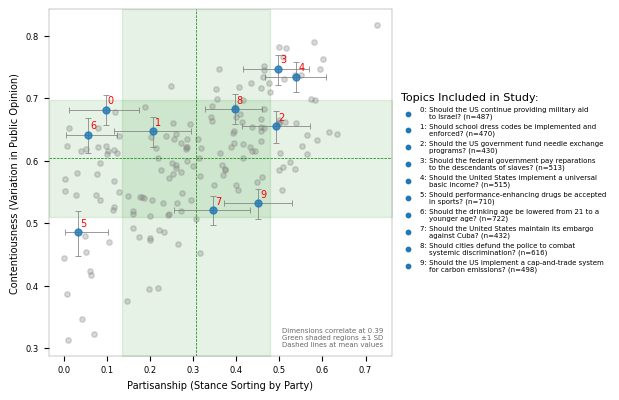

In [21]:

topic_features["topic_contentiousness_scaled"] = topic_features["topic_contentiousness"] / 3 # scale to 0-1
topic_features["topic_contentiousness_scaled_lower_ci"] = topic_features["topic_contentiousness_lower_ci"] / 3
topic_features["topic_contentiousness_scaled_upper_ci"] = topic_features["topic_contentiousness_upper_ci"] / 3

def plot_topics(topic_features, x_key, y_key, x_label, y_label, title, label_points, wrap_width=50, figsize=(7.2, 4.5)):
    # Create a figure 7.2" wide by 4.5" tall
    fig = plt.figure(figsize=figsize)
    # Make a 1×2 grid: left for the plot, right for the legend
    gs = gridspec.GridSpec(1, 2, width_ratios=[4.5/7.2, (7.2-4.5)/7.2], wspace=0.03, figure=fig)
    
    # Left axis: the main scatter + errorbars
    ax = fig.add_subplot(gs[0])
    # Right axis: we'll use this just for holding the legend
    ax_leg = fig.add_subplot(gs[1])
    ax_leg.axis('off')  # turn off the legend axis itself
    
    # split out the labeled vs. unlabeled points
    labeled   = topic_features.loc[label_points]
    unlabeled = topic_features.drop(label_points, errors='ignore')
    
    # unlabeled points
    ax.scatter(
        unlabeled[x_key], unlabeled[y_key],
        alpha=0.3, color='tab:gray', s=15, label=None
    )
    
    # labeled points + errorbars
    xerr = [
        labeled[x_key] - labeled[f"{x_key}_lower_ci"],
        labeled[f"{x_key}_upper_ci"] - labeled[x_key]
    ]
    yerr = [
        labeled[y_key] - labeled[f"{y_key}_lower_ci"],
        labeled[f"{y_key}_upper_ci"] - labeled[y_key]
    ]
    ax.errorbar(
        labeled[x_key], labeled[y_key],
        xerr=xerr, yerr=yerr,
        fmt='o', markersize=5, alpha=0.8, 
        ecolor='gray', elinewidth=.7, capsize=2, capthick=.7
    )
    
    # labels, text, etc.
    ax.set_xlabel(x_label, fontsize=7)
    ax.set_ylabel(y_label, fontsize=7)
    
    # shade ±1 SD
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    mean_x, std_x = topic_features[x_key].mean(), topic_features[x_key].std()
    mean_y, std_y = topic_features[y_key].mean(), topic_features[y_key].std()
    ax.fill_betweenx([y_min, y_max],
                     mean_x - std_x, mean_x + std_x,
                     color='green', alpha=0.1, zorder=-10)
    ax.fill_between([x_min, x_max],
                    mean_y - std_y, mean_y + std_y,
                    color='green', alpha=0.1, zorder=-10)
    ax.axvline(mean_x, color='green', linestyle='--', linewidth=0.5)
    ax.axhline(mean_y, color='green', linestyle='--', linewidth=0.5)
    
    # annotate and build legend handles
    handles = []
    for i, idx in enumerate(label_points):
        point = topic_features.loc[idx]
        ax.text(point[x_key] + .005,
                point[y_key] + .01,
                str(i), fontsize=7, color='red')
        # create a dummy handle for this label
        h = ax.scatter(
            [], [], color='tab:blue', s=10, 
            label="\n    ".join(wrap(f"{i}: {idx} (n={int(point[f'polarization_contentiousness_count'])})", wrap_width))
            )
        handles.append(h)
    

    # Legend in the right-hand axis
    ax_leg.legend(handles=handles,
                  loc='center',
                  fontsize=5,
                  frameon=False,
                  title=title,
                  title_fontsize=8,
                  alignment="left")
    
    # reset limits & ticks
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.tick_params(axis='both', labelsize=6)
    
    # bottom note
    corr = np.round(np.corrcoef(
        topic_features.loc[label_points][x_key],
        topic_features.loc[label_points][y_key]
    )[0,1], 2)

    # place inside the left axis, at the bottom right
    ax.text(
        0.975, 0.025,
        f"Dimensions correlate at {corr}\nGreen shaded regions ±1 SD\nDashed lines at mean values",
        transform=ax.transAxes,      # use axis coordinates
        ha='right',                  # right‐aligned
        va='bottom',                 # bottom‐aligned
        fontsize=5,
        color='dimgray'
    )
    
    # Customize the spines (the boxes around the figure)
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(0.3)
    
    plt.tight_layout(rect=[0, .05, 1, 1])
    

    



selected_topics = [
        'Should the US continue providing military aid to Israel?',
        'Should school dress codes be implemented and enforced?',
        'Should the US government fund needle exchange programs?',
        'Should the federal government pay reparations to the descendants of slaves?',
        'Should the United States implement a universal basic income?',

        'Should performance-enhancing drugs be accepted in sports?',
        'Should the drinking age be lowered from 21 to a younger age?',
        'Should the United States maintain its embargo against Cuba?',
        'Should cities defund the police to combat systemic discrimination?',
        'Should the US implement a cap-and-trade system for carbon emissions?',
    ]

plot_topics(
    topic_features, 
    'topic_polarization', 
    'topic_contentiousness_scaled', 
    x_label="Partisanship (Stance Sorting by Party)",
    y_label="Contentiousness (Variation in Public Opinion)",
    title="Topics Included in Study:",
    label_points=selected_topics
)


# plt.title(f"Topics included in study", fontsize=8)
# plt.xlabel("Polarization (Matthews correlation of party with yes/no)", fontsize=7)
# plt.ylabel("Contentiousness (Std of population responses on 7-point scale)", fontsize=7)


# plt.figtext(0.5, .03, f"Dimensions correlate at {np.round(np.corrcoef(topic_features.loc[selected_topics]['topic_polarization'], topic_features.loc[selected_topics]['topic_contentiousness'])[0, 1], 2)}.", wrap=True, horizontalalignment='center', fontsize=6)

plt.savefig("fig_selected_topics_partisanship_contentiousness.pdf", format='pdf')

In [27]:
# print standard deviations across dimensions for selected topics, and for all topics:
SDs = pd.DataFrame()
SDs["selected_topics"] = topic_features.loc[selected_topics][["topic_contentiousness_scaled", "topic_polarization"]].std()
SDs["all_topics"] = topic_features[["topic_contentiousness_scaled", "topic_polarization"]].std()

SDs.loc["topic_mean_identity_threat", "all_topics", ] = topic_features["topic_mean_identity_threat"].std()
SDs.loc["topic_mean_identity_threat", "selected_topics"] = topic_features.loc[selected_topics]["topic_mean_identity_threat"].std()

SDs


,selected_topics,all_topics
party,,
topic_contentiousness_scaled,0.090659,0.093646
topic_polarization,0.196761,0.172368
topic_mean_identity_threat,0.102085,0.096760


/var/folders/2l/3kmvzs0s1sggnw_9sl0ls8080000gn/T/ipykernel_37339/1669050973.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, .05, 1, 1])


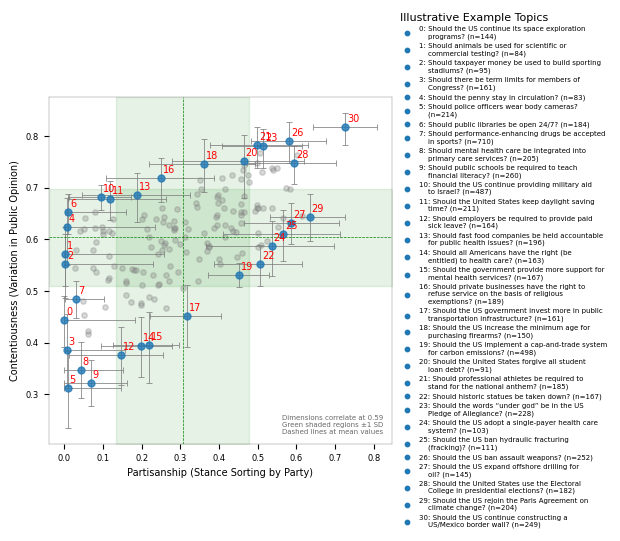

In [ ]:

plot_topics(
    topic_features, 
    'topic_polarization', 
    'topic_contentiousness_scaled', 
    x_label="Partisanship (Stance Sorting by Party)",
    y_label="Contentiousness (Variation in Public Opinion)",
    title="Illustrative Example Topics",
    label_points=topic_features[topic_features["polarization_contentiousness_exterior"] == True].sort_values(["topic_polarization"]).index,
    wrap_width=50,
    figsize=(7.2, 4.5)
)

plt.savefig("fig_example_topics_polarization_contentiousness.pdf", format="pdf", bbox_inches="tight")

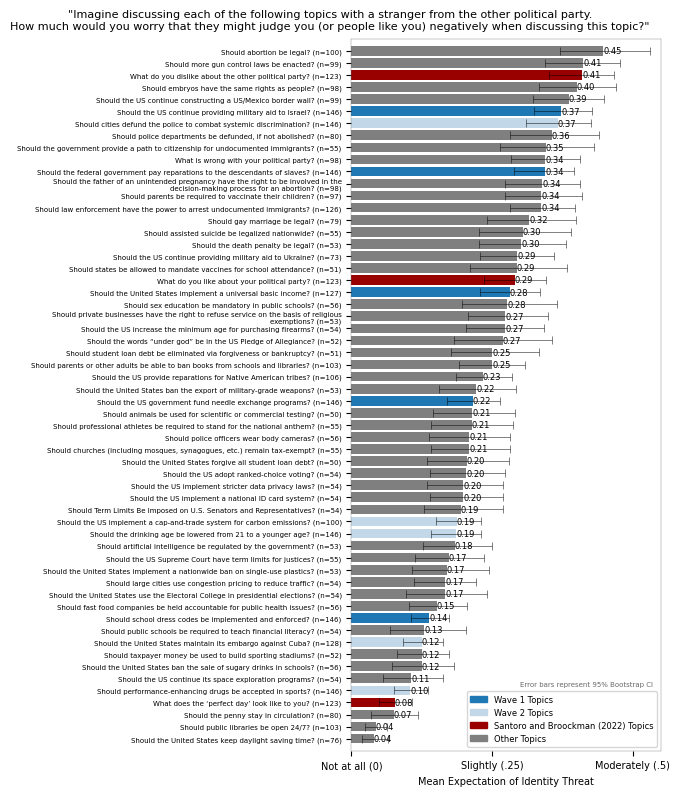

In [44]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(7.2, 8))

# move the left edge of the axes in to 0.30 of figure width (30%) so long y‑labels fit
fig.subplots_adjust(left=0.53, right=0.96, top=0.94, bottom=0.05)

wave1_topics = [
        'Should the US continue providing military aid to Israel?',
        'Should school dress codes be implemented and enforced?',
        'Should the US government fund needle exchange programs?',
        'Should the federal government pay reparations to the descendants of slaves?',
        'Should the United States implement a universal basic income?',
    ]
    
wave2_topics = [
        'Should performance-enhancing drugs be accepted in sports?',
        'Should the drinking age be lowered from 21 to a younger age?',
        'Should the United States maintain its embargo against Cuba?',
        'Should cities defund the police to combat systemic discrimination?',
        'Should the US implement a cap-and-trade system for carbon emissions?',
    ]
SB_topics = [
    'What do you dislike about the other political party?',
    'What do you like about your political party?',
    'What does the ‘perfect day’ look like to you?',
]


# now do your plotting exactly as before, but always on ax:
bars1 = ax.barh(
    np.arange(len(IT_data_summary
)),
    IT_data_summary
['topic_mean_identity_threat'],
    color=[
        WHARTON_RED if t in SB_topics else
        'tab:blue' if t in wave1_topics else
        WHARTON_LIGHT_BLUE if t in wave2_topics else
        WHARTON_GRAY
        for t in IT_data_summary
    .index
    ]
)

# errorbars, text, ticks, legend etc. all on ax:
for i, row in IT_data_summary.iterrows():
    ax.errorbar(
        row['topic_mean_identity_threat'], i,
        xerr=[
          [row['topic_mean_identity_threat'] - row['topic_mean_identity_threat_lower_ci']],
          [row['topic_mean_identity_threat_upper_ci'] - row['topic_mean_identity_threat']]
        ],
        fmt='none', color='black', alpha=0.5, capsize=3, elinewidth=0.7, capthick=0.7
    )
    ax.text(
        row['topic_mean_identity_threat'], i,
        f"{row['topic_mean_identity_threat']:.2f}",
        ha='left', va='center', fontsize=6
    )

ax.set_yticks(np.arange(len(IT_data_summary)))
ax.set_yticklabels(
    ["\n".join(wrap(f"{idx} (n={int(r['identity_threat_count'])})", 90))
     for idx, r in IT_data_summary
    .iterrows()],
    fontsize=5
)

ax.set_xlabel("Mean Expectation of Identity Threat", fontsize=7)
plt.xticks([0, .25, .5, .75, 1], ["Not at all (0)", "Slightly (.25)", "Moderately (.5)", "Very (.75)", "Extremely (1)"], fontsize=7)
ax.set_xlim(0, .55)
ax.set_ylim(-1, len(IT_data_summary))

# custom legend
# Create legend patches for each group.
patches = [
    mpatches.Patch(color="tab:blue", label="Wave 1 Topics"),
    mpatches.Patch(color=WHARTON_LIGHT_BLUE, label="Wave 2 Topics"),
    mpatches.Patch(color=WHARTON_RED, label="Santoro and Broockman (2022) Topics"),
    mpatches.Patch(color=WHARTON_GRAY, label="Other Topics"),
]
ax.legend(handles=patches, loc='lower right', fontsize=6, frameon=True)

# place inside the left axis, at the bottom right
ax.text(
    0.975, 0.09,
    f"Error bars represent 95% Bootstrap CI",
    transform=ax.transAxes,      # use axis coordinates
    ha='right',                  # right‐aligned
    va='bottom',                 # bottom‐aligned
    fontsize=5,
    color='dimgray'
)


# Customize the spines (the boxes around the figure)
for spine in ax.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(0.3)

# title as figtext
plt.figtext(0.5, .95, '"Imagine discussing each of the following topics with a stranger from the other political party.\nHow much would you worry that they might judge you (or people like you) negatively when discussing this topic?"', fontsize=8, ha='center', va='bottom')

plt.savefig(
    "fig_topic_identity_threat.pdf",
    format='pdf',
    bbox_inches='tight'
)